In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from collections import Counter
from matplotlib.colors import ListedColormap

In [2]:
meddata=pd.read_csv("dataset.csv")
meddata.head()

,Patient ID,Age,Blood Pressure,Cholesterol Levels,Heart Rate,BMI,Diagnosis,Treatment Plan,Recovery Status,Medication Type,Follow-up Requirement
0,101,65,130,250,72,28.0,Hypertension with high cholesterol.,"Medication: Lisinopril (blood pressure), Stati...",Active Recovery,"Lisinopril, Statins.",Quarterly.
1,102,42,110,150,76,24.0,Pre-hypertension.,"Lifestyle modification: Regular exercise, heal...",Recovered,N/A.,Six months.
2,103,58,140,200,80,30.0,Type 2 Diabetes.,Medication: Metformin (blood sugar control). L...,Active Recovery,Metformin.,Quarterly.
3,104,71,160,220,88,32.0,Heart Failure.,"Medication: Digoxin (heart function), Furosemi...",Active Recovery,"Digoxin, Furosemide.",Monthly.
4,105,35,120,180,74,27.0,Overweight.,"Lifestyle modification: Regular exercise, heal...",Recovered,N/A.,Three months.


In [3]:
data=meddata[['Age','Blood Pressure','Cholesterol Levels','Heart Rate']]
data.head()

,Age,Blood Pressure,Cholesterol Levels,Heart Rate
0,65,130,250,72
1,42,110,150,76
2,58,140,200,80
3,71,160,220,88
4,35,120,180,74


In [4]:
S=MinMaxScaler()
data=S.fit_transform(data)
data

array([[0.8       , 0.53846154, 0.72222222, 0.24      ],
       [0.34      , 0.23076923, 0.16666667, 0.32      ],
       [0.66      , 0.69230769, 0.44444444, 0.4       ],
       [0.92      , 1.        , 0.55555556, 0.56      ],
       [0.2       , 0.38461538, 0.33333333, 0.28      ],
       [0.7       , 0.61538462, 0.61111111, 0.36      ],
       [0.4       , 0.15384615, 0.        , 0.3       ],
       [0.4       , 0.38461538, 0.44444444, 0.2       ],
       [0.2       , 0.69230769, 0.33333333, 0.5       ],
       [0.5       , 0.61538462, 0.16666667, 0.4       ],
       [0.3       , 0.46153846, 0.22222222, 0.3       ],
       [0.6       , 0.53846154, 0.27777778, 0.4       ],
       [0.7       , 0.61538462, 0.33333333, 0.3       ],
       [0.4       , 0.30769231, 0.55555556, 0.2       ],
       [0.5       , 0.53846154, 0.36111111, 0.4       ],
       [0.2       , 0.46153846, 0.5       , 0.5       ],
       [0.8       , 0.69230769, 0.44444444, 0.3       ],
       [0.9       , 0.53846154,

In [5]:
data=pd.DataFrame(data,columns=['A','B','C','D'])
data

,A,B,C,D
0,0.80,0.538462,0.722222,0.24
1,0.34,0.230769,0.166667,0.32
2,0.66,0.692308,0.444444,0.40
3,0.92,1.000000,0.555556,0.56
4,0.20,0.384615,0.333333,0.28
...,...,...,...,...
95,0.40,0.692308,0.777778,0.50
96,0.90,0.461538,0.444444,0.20
97,0.60,0.307692,0.333333,0.40
98,0.10,0.384615,0.388889,0.30


In [9]:
# from sklearn.decomposition import PCA
# # Step 2: Apply PCA for Dimensionality Reduction
# pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
# pca_data = pca.fit_transform(data)
# pca_data

In [14]:
model=KMeans(n_clusters=3)
model.fit(data)

C:\Users\SUPRATIM NAG\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [15]:
Y=model.fit_predict(data)
Y

C:\Users\SUPRATIM NAG\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 2, 1, 1, 2, 1, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 2, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 0, 2, 0, 1, 2, 0, 1, 0,
       2, 2, 0, 0, 1, 1, 0, 2, 0, 1, 0, 2, 1, 0, 1, 2, 0, 2, 1, 0, 0, 1,
       2, 1, 2, 0, 2, 1, 1, 2, 0, 1, 1, 0, 2, 0, 0, 1, 2, 1, 0, 1, 2, 0,
       0, 1, 2, 1, 0, 2, 0, 1, 1, 0, 2, 0])

In [16]:
data['Cluster']=Y
data

,A,B,C,D,Cluster
0,0.80,0.538462,0.722222,0.24,1
1,0.34,0.230769,0.166667,0.32,2
2,0.66,0.692308,0.444444,0.40,1
3,0.92,1.000000,0.555556,0.56,1
4,0.20,0.384615,0.333333,0.28,2
...,...,...,...,...,...
95,0.40,0.692308,0.777778,0.50,1
96,0.90,0.461538,0.444444,0.20,1
97,0.60,0.307692,0.333333,0.40,0
98,0.10,0.384615,0.388889,0.30,2


In [17]:
cent=model.cluster_centers_
cent

array([[0.44564103, 0.44773176, 0.43518519, 0.37435897],
       [0.76352941, 0.71266968, 0.63153595, 0.49588235],
       [0.18814815, 0.22792023, 0.2191358 , 0.27037037]])

<Axes: xlabel='A', ylabel='B'>

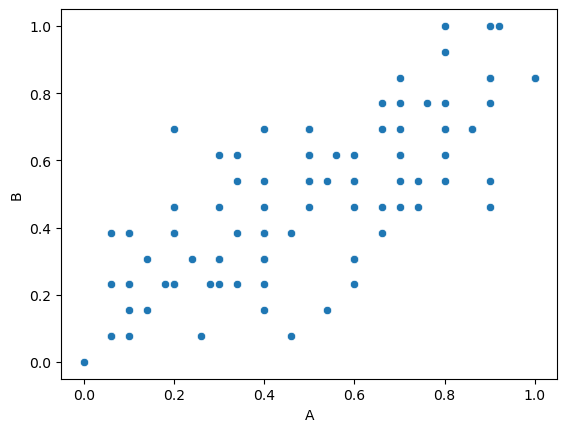

In [18]:
Counter(model.labels_)
Counter({1:50,0:100})
sns.scatterplot(data=data,x='A',y='B')

<Axes: xlabel='A', ylabel='B'>

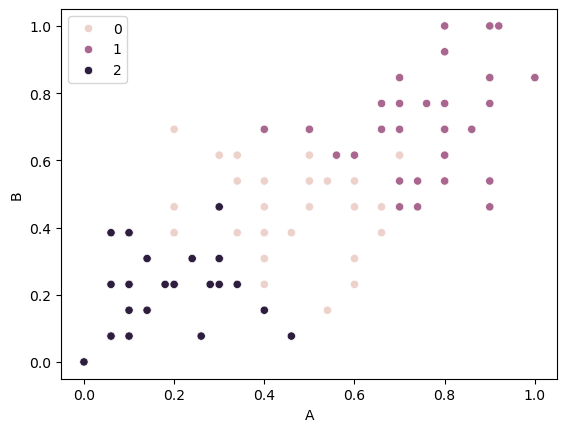

In [19]:
sns.scatterplot(data=data,x='A',y='B',hue=model.labels_)